In [51]:
import cv2
import os
data_dir = r"D:\img" #資料路徑
categories = ["cat","dog","fox"] #動物的種類 
td = []

In [52]:
# In[3]:


IMG_SIZE = 150 #圖片大小
for category in categories:
    cn = categories.index(category)
    path = os.path.join(data_dir,category)
    print(path)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            td.append([new_array,cn])
        except:
            pass
#        break
print(len(td))

D:\img\cat
D:\img\dog
D:\img\fox
663


In [53]:
# In[4]:


import random
random.shuffle(td)

In [54]:
# In[5]:


import numpy as np
X =[]
Y=[]
for features,label in td:
    X.append(features)
    Y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)

In [55]:
# In[6]:


import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(Y,pickle_out)
pickle_out.close()

(338, 600, 3)


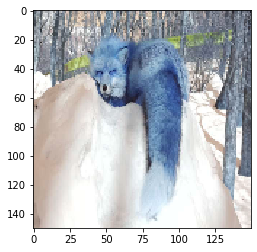

In [56]:
# In[7]:


print(img_array.shape)
import matplotlib.pyplot as plt
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [57]:
# In[8]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import datasets, layers, models
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import numpy
import time

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0
y = numpy.array(y)
dense_layers = [2]
layer_sizes = [64]
conv_layers = [3]
print(len(X))
print(len(y))

663
663


In [58]:
# In[9]:


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 73984)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 73984)            

In [59]:
# In[10]:


history = model.fit(X,y,batch_size=32,epochs=200,validation_split=0.3)

Train on 464 samples, validate on 199 samples
Epoch 1/200
464/464 [==============================] - 6s 12ms/sample - loss: 1.2039 - accuracy: 0.3448 - val_loss: 1.0939 - val_accuracy: 0.3618
Epoch 2/200
464/464 [==============================] - 5s 11ms/sample - loss: 1.0885 - accuracy: 0.3922 - val_loss: 1.0753 - val_accuracy: 0.3668
Epoch 3/200
464/464 [==============================] - 5s 11ms/sample - loss: 1.0533 - accuracy: 0.4397 - val_loss: 1.0752 - val_accuracy: 0.3970
Epoch 4/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.9929 - accuracy: 0.4892 - val_loss: 1.1745 - val_accuracy: 0.4171
Epoch 5/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.9306 - accuracy: 0.6013 - val_loss: 1.0615 - val_accuracy: 0.5477
Epoch 6/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.7822 - accuracy: 0.6703 - val_loss: 1.0272 - val_accuracy: 0.5427
Epoch 7/200
464/464 [==============================] - 5s 11ms/sample - loss: 

464/464 [==============================] - 5s 11ms/sample - loss: 0.0244 - accuracy: 0.9914 - val_loss: 2.7568 - val_accuracy: 0.6281
Epoch 57/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.0191 - accuracy: 0.9957 - val_loss: 3.0401 - val_accuracy: 0.6181
Epoch 58/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.0228 - accuracy: 0.9957 - val_loss: 3.6802 - val_accuracy: 0.5980
Epoch 59/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.0039 - accuracy: 1.0000 - val_loss: 4.3257 - val_accuracy: 0.6231
Epoch 60/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.0096 - accuracy: 0.9978 - val_loss: 3.6590 - val_accuracy: 0.5980
Epoch 61/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.0104 - accuracy: 0.9957 - val_loss: 3.5902 - val_accuracy: 0.6181
Epoch 62/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.0185 - accuracy: 0.9914 - val_loss: 3.0021 - val_a

Epoch 112/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 3.8288 - val_accuracy: 0.5980
Epoch 113/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.0034 - accuracy: 0.9978 - val_loss: 4.1323 - val_accuracy: 0.5528
Epoch 114/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.0055 - accuracy: 0.9978 - val_loss: 3.9069 - val_accuracy: 0.6131
Epoch 115/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.0022 - accuracy: 1.0000 - val_loss: 3.8073 - val_accuracy: 0.6080
Epoch 116/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.9913 - val_accuracy: 0.6030
Epoch 117/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 3.9615 - val_accuracy: 0.6131
Epoch 118/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.0068 - accuracy: 0.9978 - val_

464/464 [==============================] - 5s 11ms/sample - loss: 0.0112 - accuracy: 0.9957 - val_loss: 4.7703 - val_accuracy: 0.6231
Epoch 168/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.0034 - accuracy: 0.9978 - val_loss: 5.1077 - val_accuracy: 0.6231
Epoch 169/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.0118 - accuracy: 0.9978 - val_loss: 5.0117 - val_accuracy: 0.6382
Epoch 170/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.0109 - accuracy: 0.9914 - val_loss: 3.2357 - val_accuracy: 0.6482
Epoch 171/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.0149 - accuracy: 0.9935 - val_loss: 3.9120 - val_accuracy: 0.6482
Epoch 172/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.0234 - accuracy: 0.9914 - val_loss: 4.8877 - val_accuracy: 0.5729
Epoch 173/200
464/464 [==============================] - 5s 11ms/sample - loss: 0.0301 - accuracy: 0.9914 - val_loss: 3.8224 -

In [60]:
# In[11]:


model.save('trainCNN.h5')

In [61]:
# In[12]:


print(history.history['val_loss'])
print(history.history['loss'])

[1.0938968574581434, 1.0753433135286647, 1.0751796649329026, 1.1745096097639458, 1.0614578981495382, 1.02722271063819, 1.0079176977052162, 1.1749312164795458, 1.1669895834659212, 1.1671433257098174, 1.2901010926644407, 1.3153919969970858, 1.7500716765322277, 1.4389335653889719, 1.7729226141119723, 1.834955251396601, 2.0225977753874047, 1.792704652901271, 2.130467671245786, 2.1999398404030344, 2.4179864816330188, 2.0590490000930863, 2.262483167887932, 2.1834962212260645, 2.5606161937042695, 2.488843532063853, 2.413792782692454, 2.3150843064389637, 2.650662393426176, 2.428893360061262, 2.2496634751708062, 2.247915021139174, 2.8927001330121676, 2.7267072356525976, 2.8472893705320117, 3.112351204282674, 2.1933663957682086, 3.380318097732774, 2.3973133839554523, 2.647703815345189, 2.862206746585405, 2.967889784568518, 2.6346779444708894, 2.788096928716305, 2.592193634665791, 3.058693399381398, 3.0610570212704453, 2.633439253323042, 2.75106501699093, 3.2058061594939113, 3.369056799902988, 2.

663/1 - 2s - loss: 2.4256 - accuracy: 0.8748


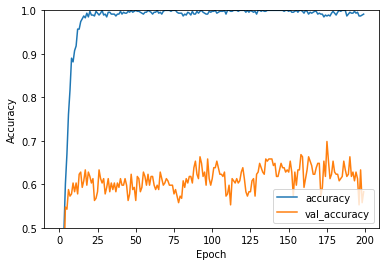

In [62]:
# In[13]:


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X,  y, verbose=2)

In [63]:
# In[14]:


import cv2
import tensorflow as tf

def prepare(filepath): 
    img_array = cv2.imread(filepath)  
    img_array = img_array/255.0
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE,3) 

In [64]:
# In[18]:


model = tf.keras.models.load_model("trainCNN.h5")

prediction = model.predict([prepare(r'D:\test\1.jpeg')])
print(prediction)
print(type(prediction))
maxindex  = np.argmax(prediction)
print(categories[maxindex])

[[1.00000000e+00 1.17127752e-10 1.26004604e-14]]
<class 'numpy.ndarray'>
cat


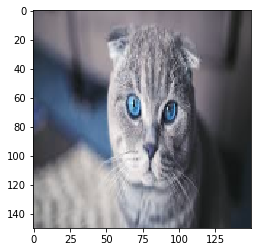

In [65]:
# In[16]:


img_array = cv2.imread(r'D:\test\11.jpg') 
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()